<a href="https://colab.research.google.com/github/brian654321/Garden-Doctor-App/blob/main/actual_efficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.backend import is_keras_tensor
from keras import backend as K
from keras.layers import Activation, Dense, Input, BatchNormalization, Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, multiply, Permute, Concatenate, Add, Lambda, Dropout, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import get_source_inputs
from keras.activations import sigmoid
from keras.applications.inception_v3 import preprocess_input
from IPython.display import Image, display
import tensorflow as tf
import sklearn
import matplotlib.cm as cm
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os
import cv2
is_keras_tensor = K.is_keras_tensor


data_directory = r"/Users/User/Desktop/new_plant_diseaes"
categories = [
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry___healthy', 
    'Cherry___Powdery_mildew', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 
    'Corn___healthy', 'Corn___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 
    'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 
    'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 
    'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_mosaic_virus', 
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
    ]


In [ ]:
img_size = 224

def create_dataset():
    data_set = []
    X = []
    y = []
    for category in categories:
        print(category)
        path = os.path.join(data_directory, category)
        class_num = categories.index(category)
        list_directory = os.listdir(path)
        # Only 1000 images per class
        for i in range(1000):
            image = list_directory[i]
            img_array = cv2.imread(os.path.join(path, image))
            resized_array = cv2.resize(img_array, (img_size, img_size))
            # plt.imshow(resized_array)
            # plt.show()
            data_set.append([resized_array, class_num])
            X.append(resized_array)
            y.append(class_num)
    X = np.array(X).reshape(-1, img_size, img_size, 3)
    y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)
    return X_train, y_train, X_test, y_test, X_val, y_val
  
X_train, y_train, X_test, y_test, X_val, y_val = create_dataset()

Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Cherry___healthy
Cherry___Powdery_mildew
Corn___Cercospora_leaf_spot Gray_leaf_spot
Corn___Common_rust
Corn___healthy
Corn___Northern_Leaf_Blight
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Squash___Powdery_mildew
Strawberry___healthy
Strawberry___Leaf_scorch
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:


IMG_SHAPE = (img_size, img_size, 3)
conv_base = tf.keras.applications.EfficientNetB3(weights="imagenet", include_top=False, input_shape=IMG_SHAPE)
model = tf.keras.Sequential()
model.add(conv_base)
model.add(tf.keras.layers.GlobalMaxPooling2D(name="gap"))
#avoid overfitting
model.add(tf.keras.layers.Dropout(rate=0.2, name="dropout_out"))
# Set NUMBER_OF_CLASSES to the number of your final predictions.
model.add(tf.keras.layers.Dense(len(categories), activation="softmax", name="fc_out"))
conv_base.trainable = False
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),
    metrics=["acc"],
)

# base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
#                                               include_top=False,
#                                               weights='imagenet')
# base_model.trainable = False
# model = tf.keras.Sequential([
#                           base_model,
#                           tf.keras.layers.GlobalAveragePooling2D(),
#                           tf.keras.layers.Dense(34, activation='softmax')])
 
# model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/200
744/744 [==============================] - 208s 234ms/step - loss: 5.4370 - acc: 0.0567 - val_loss: 2.7926 - val_acc: 0.2459
Epoch 2/200
744/744 [==============================] - 170s 229ms/step - loss: 3.5868 - acc: 0.1903 - val_loss: 1.8766 - val_acc: 0.4608
Epoch 3/200
744/744 [==============================] - 170s 228ms/step - loss: 2.6896 - acc: 0.3162 - val_loss: 1.4187 - val_acc: 0.5878
Epoch 4/200
744/744 [==============================] - 170s 228ms/step - loss: 2.2056 - acc: 0.4155 - val_loss: 1.1483 - val_acc: 0.6696
Epoch 5/200
744/744 [==============================] - 170s 229ms/step - loss: 1.8586 - acc: 0.4853 - val_loss: 0.9772 - val_acc: 0.7114
Epoch 6/200
744/744 [==============================] - 170s 228ms/step - loss: 1.6397 - acc: 0.5373 - val_loss: 0.8525 - val_acc: 0.7471
Epoch 7/200
744/744 [==============================] - 170s 228ms/step - loss: 1.4601 - acc: 0.5833 - val_loss: 0.7701 - val_acc: 0.7688
Epoch 8/200
744/744 [====================

160/160 - 30s - loss: 0.1445 - acc: 0.9535
0.953529417514801


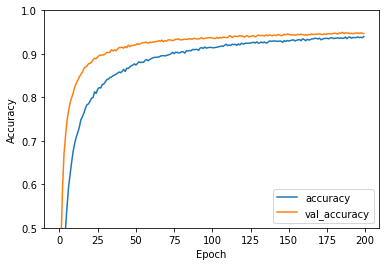

In [ ]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
print(test_acc)

In [ ]:


# model.save("efficient_final_model")
# model = tf.keras.models.load_model("mobileNet_model")


# image_inputs = ct.ImageType(shape=(1, 224, 224, 3))
# coreml_model_file = 'mobilenet.mlmodel'
# output = ['InceptionV1/Logits/Predictions/Softmax']


# coreml_model = ct.convert(model, 
#                           inputs=[image_inputs], 
#                           outputs=output)

# coreml_model.save(coreml_model_file)


In [ ]:
!pip3 install coremltools

In [ ]:
import coremltools as ct

In [ ]:

model.save("efficientNet_model")
tf_model_path = model
image_inputs = ct.ImageType(shape=(1, 224, 224, 3))
coreml_model_file = 'efficientNet.mlmodel'
classifier_config = ct.ClassifierConfig(categories)


coreml_model = ct.convert(tf_model_path, 
                          inputs=[image_inputs], source = "tensorflow", classifier_config=classifier_config
                          )

coreml_model.save(coreml_model_file)

Translating MIL ==> MLModel Ops: 100%|██████████████████████████████████████████| 1931/1931 [00:13<00:00, 146.30 ops/s]
